In [1]:
import sys, os
os.chdir("../source")
import SQcircuit as sq
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

Spectral data:   0%|          | 0/220 [00:00<?, ?it/s]

(<Figure size 900x600 with 1 Axes>,
 <AxesSubplot:xlabel='$n_g$', ylabel='energy [GHz]'>)

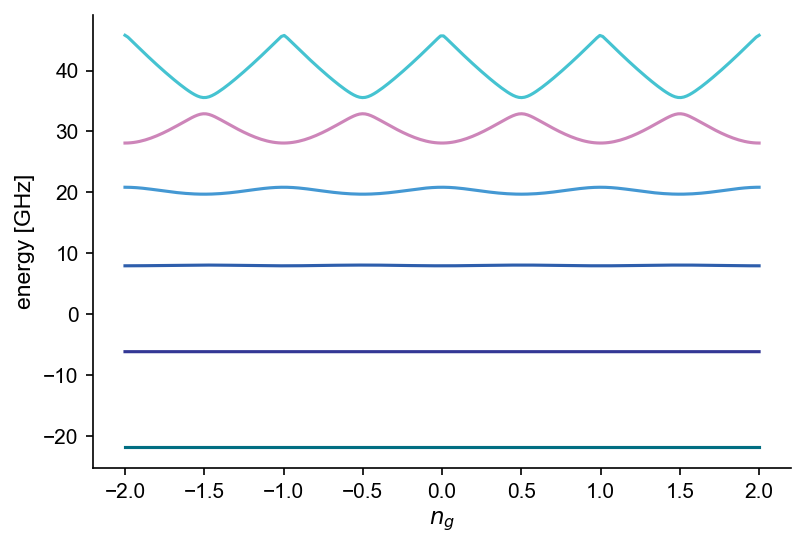

In [2]:
import scqubits as scq
tmon = scq.TunableTransmon(EJmax=30.0,EC=1.2,d=0.01,flux=0.0,ng=0.0,ncut=30)
ng_list = np.linspace(-2, 2, 220)
tmon.plot_evals_vs_paramvals('ng', ng_list, evals_count=6)

# Transmon

In [3]:
C = sq.Capacitor(1.2, 'GHz')
JJ = sq.Junction(30.0,'GHz')

circuitElements = {
    (0, 1): [C, JJ]
}

cr1 = sq.Circuit(circuitElements)

cr1.setTruncationNumbers([30])

## Eigenfrequencies

In [4]:
numEig = 6
ng = np.linspace(-2, 2, 100)
eigenValues = np.zeros((numEig, len(ng)))

for i in range(len(ng)):
    cr1.linkCharges({0: sq.Charge(ng[i])})
    eigenValues[:, i], _ = cr1.run(numEig)

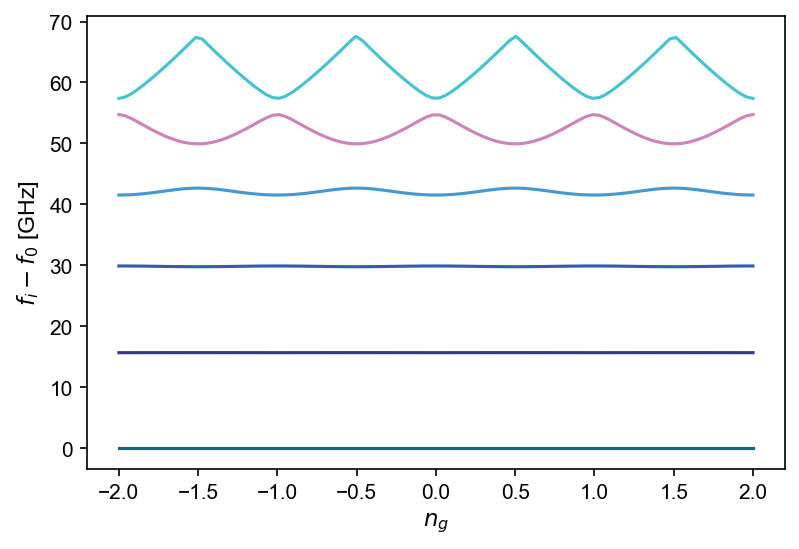

In [5]:
sq.unit.setFreq('GHz')
plt.figure()
for i in range(numEig):
    plt.plot(ng, (eigenValues[i, :] - eigenValues[0, :]))

plt.xlabel(r"$n_g$")
plt.ylabel(r"$f_i-f_0$ [GHz]")
plt.show()